In [1]:
import os
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from scipy.io import loadmat
import h5py

In [2]:
# third try
pth_pickle = r'\\10.162.80.16\Andre_expansion\data\Skin Lymphedema\L0001_diseased_150\StarDist_9_17_2024_pdac\stardist_feature_df_pickles'
pth_indices = os.path.join(pth_pickle, 'xy_inds')
pth_registered = os.path.join(pth_indices, 'registered')

pth_registered_list = sorted([os.path.join(pth_registered, f) for f in os.listdir(pth_registered) if f.endswith('.mat')])
pth_indices_list = sorted([os.path.join(pth_indices, f) for f in os.listdir(pth_indices) if f.endswith('.mat')])
pth_pickle_list = sorted([os.path.join(pth_pickle, f) for f in os.listdir(pth_pickle) if f.endswith('.pkl')])

temp = [f[-8:-4] for f in os.listdir(pth_pickle)]

# prune if not in pickle list
pth_pickle_list_2 = [f for i,f in enumerate(pth_pickle_list)]
#pth_registered_list_2 = [f for i,f in enumerate(pth_registered_list) if i not in skipped]
#pth_indices_list_2 = [f for i,f in enumerate(pth_indices_list) if i not in skipped]

In [3]:
def load_var_from_mat(mat_file_name, varname):

    try:
        data = loadmat(mat_file_name)

        var = data[varname]
    except:
        data = h5py.File(mat_file_name, 'r')

        var = data[varname][()]

    return var

In [4]:
print(len(pth_registered_list))
print(len(pth_indices_list))
print(len(pth_pickle_list_2))

144
144
144


In [5]:
for ind in range(len(pth_registered_list)):

    print(pth_registered_list[ind])
    print(pth_indices_list[ind])
    print(pth_pickle_list_2[ind])
    print()

\\10.162.80.16\Andre_expansion\data\Skin Lymphedema\L0001_diseased_150\StarDist_9_17_2024_pdac\stardist_feature_df_pickles\xy_inds\registered\L001_diseased_0001.mat
\\10.162.80.16\Andre_expansion\data\Skin Lymphedema\L0001_diseased_150\StarDist_9_17_2024_pdac\stardist_feature_df_pickles\xy_inds\L001_diseased_0001.mat
\\10.162.80.16\Andre_expansion\data\Skin Lymphedema\L0001_diseased_150\StarDist_9_17_2024_pdac\stardist_feature_df_pickles\L001_diseased_0001.pkl

\\10.162.80.16\Andre_expansion\data\Skin Lymphedema\L0001_diseased_150\StarDist_9_17_2024_pdac\stardist_feature_df_pickles\xy_inds\registered\L001_diseased_0003.mat
\\10.162.80.16\Andre_expansion\data\Skin Lymphedema\L0001_diseased_150\StarDist_9_17_2024_pdac\stardist_feature_df_pickles\xy_inds\L001_diseased_0003.mat
\\10.162.80.16\Andre_expansion\data\Skin Lymphedema\L0001_diseased_150\StarDist_9_17_2024_pdac\stardist_feature_df_pickles\L001_diseased_0003.pkl

\\10.162.80.16\Andre_expansion\data\Skin Lymphedema\L0001_diseased_1

In [6]:
reg_coord = load_var_from_mat(pth_registered_list[ind], 'xye')
inds = np.transpose(load_var_from_mat(pth_indices_list[ind], 'inds'))
with open(pth_pickle_list_2[ind], 'rb') as f:
    df = pickle.load(f)

In [7]:
print(len(reg_coord))
print(len(inds))

2
24857


In [8]:
max(inds)

array([2516.6784668])

In [9]:
len(df)

24857

In [10]:
inds.shape

(24857, 1)

In [11]:
df2 = df.iloc[inds.flatten()]

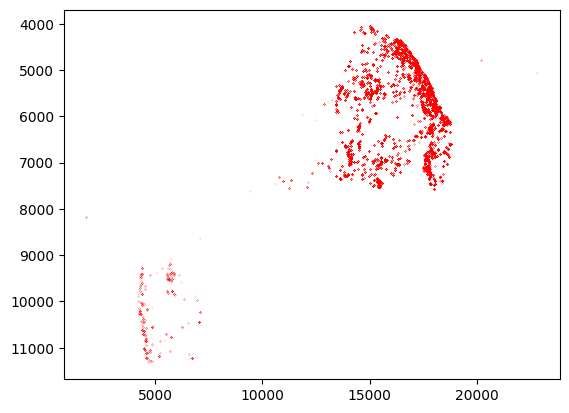

In [12]:
plt.scatter(df2['Centroid_x'], df2['Centroid_y'], s=0.01, c='r')
plt.gca().invert_yaxis()

In [16]:
from scipy.io import savemat

# outpth = r'\\10.162.80.16\Andre_expansion\data\monkey_fetus\Stardist\StarDist_12_25_23\dfs_fixed_centroids_3_14\mat_with_reg_coords'
outpth = rf'{pth_registered}\mat_with_reg_coords'
if not os.path.exists(outpth):
    os.mkdir(outpth)

# savemat(outpth, {'x_y_area':Cy5_output})
print(outpth)

\\10.162.80.16\Andre_expansion\data\Skin Lymphedema\L0001_diseased_150\StarDist_9_17_2024_pdac\stardist_feature_df_pickles\xy_inds\registered\mat_with_reg_coords


In [21]:
print(len(inds))
print(len(reg_coord[0]))

24857
24857


In [26]:
reg_coord.shape

(2, 27674)

In [27]:
len(reg_coord[0])

27674

In [28]:
for ind in range(len(pth_registered_list)):
    nm = os.path.basename(pth_registered_list[ind])[:-4]
    nm = "".join([nm,'.mat'])

    outnm = rf'{outpth}\{nm}'
    print(nm)
    print(outnm)
    #break
    
    # likely a small portion of the slides will not work due to the registration process pushing those coordinates out of bounds for that image, 
    # in the monkey fetus, like 3/1150 of these slides exist
    
    if not os.path.exists(outnm):
    
        reg_coord = load_var_from_mat(pth_registered_list[ind], 'xye')
        inds = np.transpose(load_var_from_mat(pth_indices_list[ind], 'inds'))
        
        if len(reg_coord[0]) != len(inds):
            print(f'SKIPPING {nm}')
            continue
        
        with open(pth_pickle_list_2[ind], 'rb') as f:
            df = pickle.load(f)
            
        df2 = df.iloc[inds.flatten()]
        df2.insert(0, 'reg_cent_y_5x_cropped', reg_coord[1])
        df2.insert(0, 'reg_cent_x_5x_cropped', reg_coord[0])

        savemat(outnm, {'df':df2, 'colnames': df2.columns.tolist()})
    
        #break
        
        # fig, ax = plt.subplots(1,2, figsize=(20,5))
        # df3 = df2[df2['Area'] > 300]
        # ax[0].scatter(df3['Centroid_x'], df3['Centroid_y'], s=0.1, c='r')
        # ax[0].invert_yaxis()
        # 
        # ax[1].scatter(df3['reg_cent_x_2_5x_cropped'], df3['reg_cent_y_2_5x_cropped'], s=0.1, c='b')
        # ax[1].invert_yaxis()

L001_diseased_0001.mat
\\10.162.80.16\Andre_expansion\data\Skin Lymphedema\L0001_diseased_150\StarDist_9_17_2024_pdac\stardist_feature_df_pickles\xy_inds\registered\mat_with_reg_coords\L001_diseased_0001.mat
L001_diseased_0003.mat
\\10.162.80.16\Andre_expansion\data\Skin Lymphedema\L0001_diseased_150\StarDist_9_17_2024_pdac\stardist_feature_df_pickles\xy_inds\registered\mat_with_reg_coords\L001_diseased_0003.mat
L001_diseased_0005.mat
\\10.162.80.16\Andre_expansion\data\Skin Lymphedema\L0001_diseased_150\StarDist_9_17_2024_pdac\stardist_feature_df_pickles\xy_inds\registered\mat_with_reg_coords\L001_diseased_0005.mat
L001_diseased_0007.mat
\\10.162.80.16\Andre_expansion\data\Skin Lymphedema\L0001_diseased_150\StarDist_9_17_2024_pdac\stardist_feature_df_pickles\xy_inds\registered\mat_with_reg_coords\L001_diseased_0007.mat
L001_diseased_0009.mat
\\10.162.80.16\Andre_expansion\data\Skin Lymphedema\L0001_diseased_150\StarDist_9_17_2024_pdac\stardist_feature_df_pickles\xy_inds\registered\mat

In [17]:
outnm

'\\\\10.162.80.16\\Andre_expansion\\data\\monkey_fetus\\Stardist\\StarDist_12_25_23\\volcell_coords_with_features\\monkey_fetus_40_1204.mat'

In [21]:
df2.head()

,reg_cent_x_5x_cropped,reg_cent_y_5x_cropped,Centroid_x,Centroid_y,Area,Perimeter,Circularity,Aspect Ratio,compactness,eccentricity,...,minor_axis_length,major_axis_length,orientation_degrees,r_mean_intensity,g_mean_intensity,b_mean_intensity,r_std,g_std,b_std,slide_num
2,3963.684082,2819.011230,3828.0,2642.0,49.302166,30.232746,0.677830,2.515876,18.539124,0.917613,...,5.082859,12.787843,2413.539307,166.240005,157.789993,160.940002,23.997143,22.314554,22.590281,1204.0
3,4344.427734,2741.709473,1430.0,2388.0,30.354357,21.708908,0.809385,1.381712,15.525833,0.690073,...,5.383209,7.438044,4540.906250,161.479996,161.270004,162.550003,19.132044,18.849249,19.013237,1204.0
5,3959.632812,2818.722412,3856.0,2652.0,50.702312,27.191097,0.861756,1.258292,14.582289,0.606966,...,7.251293,9.124246,9199.191406,162.839996,163.750000,167.809998,21.893656,21.930033,22.607777,1204.0
8,4439.480957,2157.142578,1880.0,6862.0,89.753517,35.436577,0.898169,1.284029,13.991106,0.627274,...,9.519138,12.222852,5044.488770,157.059998,133.779999,177.660004,27.259058,23.380051,30.165209,1204.0
9,4411.941895,2344.285889,1702.0,5370.0,38.527706,24.884531,0.781851,1.563606,16.072586,0.768752,...,5.693094,8.901755,1026.042358,156.240005,151.509995,156.119995,19.820276,18.783606,19.135096,1204.0


In [20]:
df.columns.tolist()

['Centroid_x',
 'Centroid_y',
 'Area',
 'Perimeter',
 'Circularity',
 'Aspect Ratio',
 'compactness',
 'eccentricity',
 'extent',
 'form_factor',
 'maximum_radius',
 'mean_radius',
 'median_radius',
 'minor_axis_length',
 'orientation_degrees',
 'r_mean_intensity',
 'g_mean_intensity',
 'b_mean_intensity']

In [1]:
1/998001

1.002003004005006e-06

In [88]:
inds

array([[  161],
       [  162],
       [  164],
       ...,
       [11825],
       [11826],
       [11832]])

In [84]:
df3 = df2 # df2[df2['Area'] > 300]

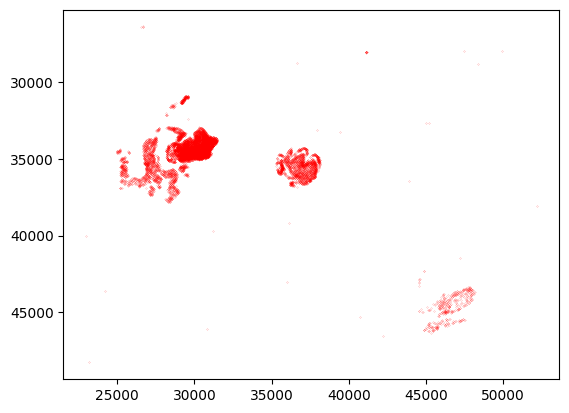

In [85]:
plt.scatter(df3['Centroid_x'], df3['Centroid_y'], s=0.01, c='r')
plt.gca().invert_yaxis()

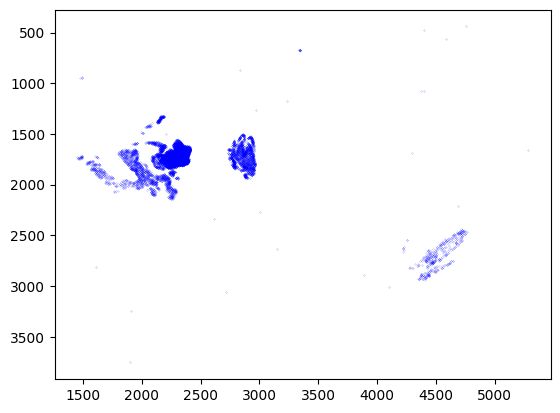

In [86]:
plt.scatter(df3['reg_cent_x_5x_cropped'], df3['reg_cent_y_5x_cropped'], s=0.01, c='b')
plt.gca().invert_yaxis()